<h1><center> Figure 2: boxplots of betas and intercepts (rows) by models (columns) </center></h1>

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import xarray as xr
import pandas as pd
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from glob import glob
import os
import subprocess
import seaborn as sns
import IPython.display as display
%matplotlib inline

##  make the graphs with biovolume now


In [4]:
file_list = glob('/work/m1c/CMIP6_biome_PSS_data/*.nc')

file_list_biovol = glob('/work/m1c/CMIP6_biome_PSS_data/*biovolume.nc')
file_list_biovol_zoo_only = [x for x in file_list_biovol if 'zoo-only' in x]
file_list_biovol_phyto_only = [x for x in file_list_biovol if 'phyto-only' in x]
file_list_biovol = list(set(file_list_biovol).difference(file_list_biovol_zoo_only+file_list_biovol_phyto_only))

In [5]:
model_list = ['CESM', 'CMCC','CNRM','GFDL', 'GISS','IPSL','UKESM']
ds_dict = {}
ds_dict['hist'] = {}
ds_dict['ssp5'] = {}
for e in ['hist', 'ssp5']:
    for m in model_list:
        model_path = [x for x in file_list_biovol if e in x and m in x]
        ds_dict[e][m]= xr.open_mfdataset(model_path)#.mean(dim=['time'])

In [6]:
file_list_biovol

['/work/m1c/CMIP6_biome_PSS_data/biom_UKESM_PSS_ssp5_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_GISS_PSS_hist_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_GFDL_PSS_hist_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_CESM_PSS_hist_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_IPSL_PSS_ssp5_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_CMCC_PSS_hist_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_GISS_PSS_ssp5_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_CESM_PSS_ssp5_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_GFDL_PSS_ssp5_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_CNRM_PSS_ssp5_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_UKESM_PSS_hist_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_CNRM_PSS_hist_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_CMCC_PSS_ssp5_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_IPSL_PSS_hist_biovolume.nc']

In [7]:
ds_dict['ssp5']['GFDL']

<xarray.Dataset>
Dimensions:               (time: 360, lat: 180, lon: 360, biovol_um3: 50)
Coordinates:
  * time                  (time) object 2071-01-16 12:00:00 ... 2100-12-16 12...
  * lat                   (lat) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                   (lon) float64 -179.5 -178.5 -177.5 ... 178.5 179.5
  * biovol_um3            (biovol_um3) float64 0.09575 0.181 ... 3.104e+12
Data variables: (12/21)
    biomes                (lat, lon) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>
    chl                   (time, lat, lon) float64 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    NB                    (biovol_um3, time, lat, lon) float64 dask.array<chunksize=(50, 360, 180, 360), meta=np.ndarray>
    total_biovolume_ssp5  (time, lat, lon) float64 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    betas_ssp5            (time, lat, lon) float64 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    intercept_ssp5        (time, lat, lon) float64 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    ...                    ...
    phymisc_per           (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    phydiat_per           (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    zmicro_per            (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    zmeso_per             (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    phyc                  (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    zooc                  (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>

In [8]:
#d = {'model':[], 'biome':[], 'experiment':[], 'betas':[], 'intercept':[]}
df_NBSS = pd.DataFrame()

In [9]:
for m in model_list:
    for b in [1, 2, 3]:
        for e in ['hist', 'ssp5']:
            df= pd.DataFrame()
            df['betas'] = pd.Series(ds_dict[e][m]['betas_'+e].where(ds_dict[e][m]['biomes']==b).where(ds_dict[e][m]['betas_'+e] != float('-inf')).values.ravel())
            df['intercept'] = pd.Series(ds_dict[e][m]['intercept_'+e].where(ds_dict[e][m]['biomes']==b).where(ds_dict[e][m]['intercept_'+e] != float('-inf')).values.ravel())
            df['total_biovolume'] = pd.Series(ds_dict[e][m]['total_biovolume_'+e].where(ds_dict[e][m]['biomes']==b).where(ds_dict[e][m]['total_biovolume_'+e] != float('-inf')).values.ravel())
            df['R2'] = pd.Series(ds_dict[e][m]['R2_'+e].where(ds_dict[e][m]['biomes']==b).where(ds_dict[e][m]['R2_'+e] != float('-inf')).values.ravel())
            df= df[~df['betas'].isna()].reset_index(drop=True)
            df= df[~df['intercept'].isna()].reset_index(drop=True)
            df= df[~df['total_biovolume'].isna()].reset_index(drop=True)
            df= df[~df['R2'].isna()].reset_index(drop=True)
            df['experiment'] = e
            if b ==1:
                df['biomes'] = 'LC'
            elif b ==2:
                df['biomes'] = 'HCSS'
            elif b ==3:
                df['biomes'] = 'HCPS'
            df['model'] = m
            df_NBSS= pd.concat([df_NBSS, df])


In [10]:
df_NBSS.rename(columns={'betas':'slope', 'model':'source'}, inplace=True)

In [11]:
df_NBSS.head()

,slope,intercept,total_biovolume,R2,experiment,biomes,source
0,-1.097475,4.872843e+13,5.104023e+13,0.996400,hist,LC,CESM
1,-1.097611,4.843630e+13,5.056010e+13,0.996380,hist,LC,CESM
2,-1.098033,4.850268e+13,5.025458e+13,0.996383,hist,LC,CESM
3,-1.098720,4.895519e+13,5.024621e+13,0.996440,hist,LC,CESM
4,-1.099769,4.993240e+13,5.051188e+13,0.996524,hist,LC,CESM


In [12]:
df_NBSS.to_csv('/work/m1c/CMIP6_biome_PSS_data/df_NBSS_for_data_dist_figs_biovolume.csv', sep= ',', index = False)

## Start from here if the data was already generated

In [13]:
df_NBSS=pd.read_csv('/work/m1c/CMIP6_biome_PSS_data/df_NBSS_for_data_dist_figs_biovolume.csv', sep=',')
#df_NBSS['intercept']= 10**(df_NBSS['intercept'])

In [4]:
df_pssdb = pd.read_csv('/Users/mc4214/Documents/CMIP6_PSS_paper/data/PSSdb_data/PSSdb_data_full.csv', sep= ',')
df_pssdb = df_pssdb.drop(columns = ['lat', 'lon', 'month', 'season'])
df_pssdb['intercept'] = 10**(df_pssdb['intercept'])


df_pssdb.head()

,biomes,slope,intercept,R2,total_biovolume,experiment,source
0,HCSS,-0.7116,3.426846e+10,0.94760,4.614245e+15,obs,PSSdb
1,HCSS,-1.0136,3.871730e+13,0.96615,9.110387e+16,obs,PSSdb
2,HCSS,-0.7279,1.123603e+11,0.86505,6.869221e+17,obs,PSSdb
3,HCSS,-0.8294,1.758717e+12,0.98330,1.754292e+17,obs,PSSdb
4,HCSS,-0.6849,7.799207e+10,0.95075,3.726014e+17,obs,PSSdb


In [15]:
df_NBSS=pd.concat([df_NBSS, df_pssdb]).reset_index(drop=True)
df_NBSS['total_biovolume']= np.log10(df_NBSS['total_biovolume'])
df_NBSS['intercept']= np.log10(df_NBSS['intercept'])
df_NBSS

,slope,intercept,total_biovolume,R2,experiment,biomes,source
0,-1.097475,13.687782,13.707913,0.996400,hist,LC,CESM
1,-1.097611,13.685171,13.703808,0.996380,hist,LC,CESM
2,-1.098033,13.685766,13.701176,0.996383,hist,LC,CESM
3,-1.098720,13.689799,13.701103,0.996440,hist,LC,CESM
4,-1.099769,13.698382,13.703394,0.996524,hist,LC,CESM
...,...,...,...,...,...,...,...
196748334,-0.581804,9.593633,9.768737,0.903101,obs,HCSS,PSSdb
196748335,-1.014763,13.386958,12.117291,0.943349,obs,HCSS,PSSdb
196748336,-0.643737,7.889982,11.290374,0.979019,obs,HCSS,PSSdb
196748337,-0.728118,11.329221,11.602857,0.945405,obs,HCSS,PSSdb


In [16]:
df_NBSS.replace([np.inf, -np.inf], np.nan, inplace=True)


In [17]:
df_NBSS=df_NBSS.dropna().reset_index(drop=True)
df_NBSS 

,slope,intercept,total_biovolume,R2,experiment,biomes,source
0,-1.097475,13.687782,13.707913,0.996400,hist,LC,CESM
1,-1.097611,13.685171,13.703808,0.996380,hist,LC,CESM
2,-1.098033,13.685766,13.701176,0.996383,hist,LC,CESM
3,-1.098720,13.689799,13.701103,0.996440,hist,LC,CESM
4,-1.099769,13.698382,13.703394,0.996524,hist,LC,CESM
...,...,...,...,...,...,...,...
196748334,-0.581804,9.593633,9.768737,0.903101,obs,HCSS,PSSdb
196748335,-1.014763,13.386958,12.117291,0.943349,obs,HCSS,PSSdb
196748336,-0.643737,7.889982,11.290374,0.979019,obs,HCSS,PSSdb
196748337,-0.728118,11.329221,11.602857,0.945405,obs,HCSS,PSSdb


In [18]:
palette_experiments= dict(hist='rosybrown', ssp5='firebrick', obs='blue')

In [19]:
np.min(df_NBSS.total_biovolume)

1.2593767136762393

In [10]:
from matplotlib.legend import Legend
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as tick
from matplotlib import ticker as mticker
def y_fmt(x, y):
    return '${:1.0e}'.format(x).replace('e', '\\times 10^{') + '}$'

In [21]:
df_pssdb = df_NBSS.loc[df_NBSS.experiment=='obs'].reset_index(drop=True)
df_NBSS = df_NBSS.loc[df_NBSS.experiment!='obs'].reset_index(drop=True)

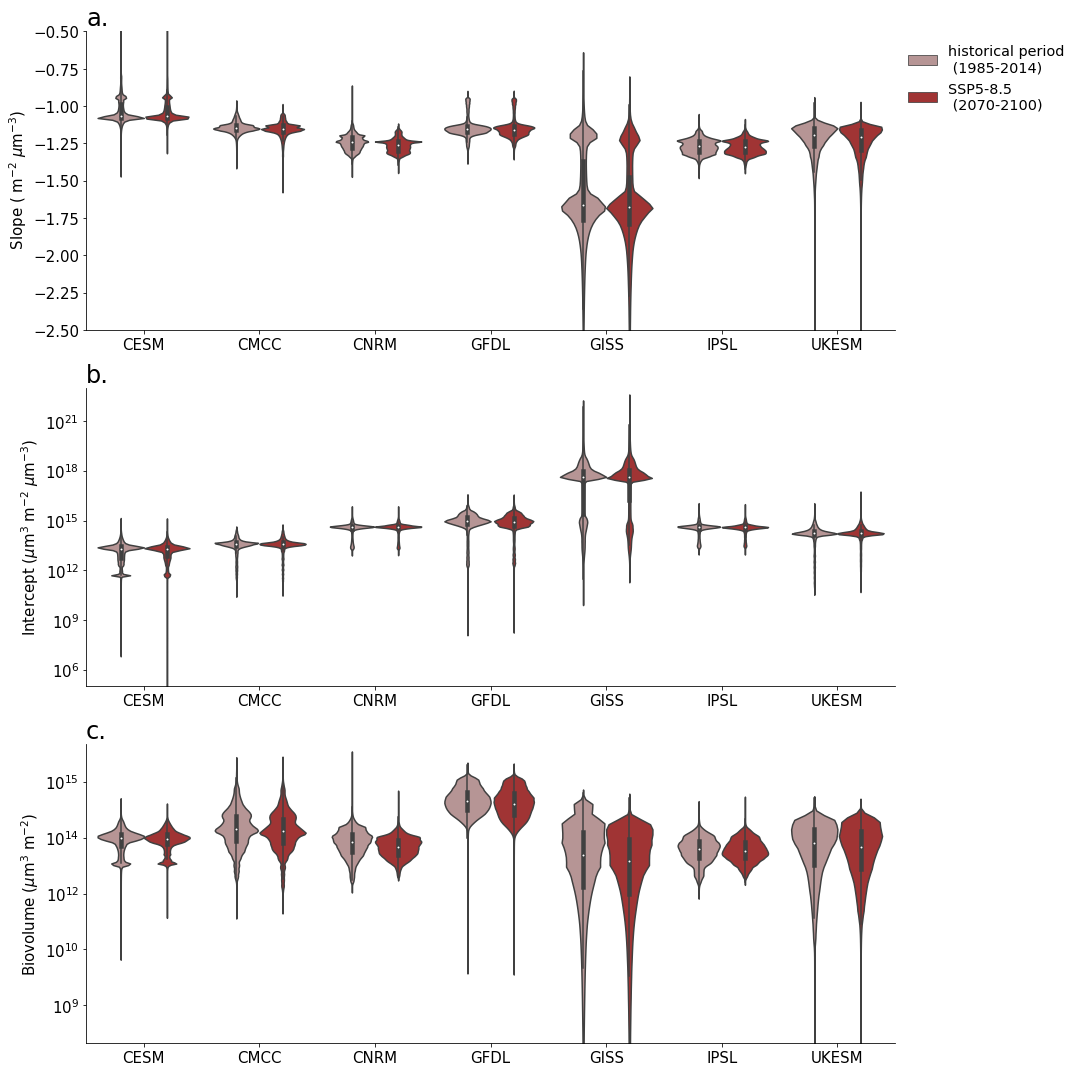

In [22]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15,15))
letters = ['a.','b.','c.']
ind=0
variables = ['slope', 'intercept', 'total_biovolume']
for r, var in enumerate(variables):
    ind +=1
    axs[r].set_title(letters[ind-1], loc='left', fontsize=24)
    if var == 'slope':
        plot = sns.violinplot(ax = axs[r], x="source", y=var, hue="experiment",palette=palette_experiments, fill=False, showfliers = False,density_norm="count", data=df_NBSS) #, flierprops=dict(marker='o', markersize=0.5)
        plot.tick_params(axis='both', which='major', labelsize=15)
        sns.despine(top = True, right = True)
        axs[r].set_ylim([-2.5, -0.5])
        axs[r].set_ylabel(r' Slope ( m$^{-2}$ $\mu$m$^{-3}$)', fontsize = 15)
        L = axs[r].legend(title='', fontsize = 'x-large',  markerscale=10, frameon=False, bbox_to_anchor=(1, 1))
        L.get_texts()[0].set_text('historical period \n (1985-2014)')
        L.get_texts()[1].set_text('SSP5-8.5 \n (2070-2100)')
        #L.get_texts()[2].set_text('observations \n (PSSdb)')

    elif var == 'intercept':
        plot = sns.violinplot(ax = axs[r], x="source", y=var, hue="experiment",palette=palette_experiments,  fill=False, showfliers = False,   density_norm="count",data=df_NBSS, log_scale=True) #, flierprops=dict(marker='o', markersize=0.5)
        plot.tick_params(axis='both', which='major', labelsize=15)
        sns.despine(top = True, right = True)
        axs[r].set_ylabel(r'Intercept ($\mu$m$^{3}$ m$^{-2}$ $\mu$m$^{-3}$)', fontsize = 15)
        axs[r].set_ylim([5, 23])
        axs[r].yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
        ymin, ymax = axs[r].get_ylim()
        tick_range = np.arange(np.floor(ymin), ymax)
        axs[r].yaxis.set_ticks(tick_range)
        axs[r].yaxis.set_major_locator(plt.MaxNLocator(6))
        #axs[r].yaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)
        axs[r].get_legend().remove()
        
    elif var == 'total_biovolume':
        plot = sns.violinplot(ax = axs[r], x="source", y=var, hue="experiment",palette=palette_experiments,  fill=False, showfliers = False,  density_norm="count",data=df_NBSS, log_scale=True) #, flierprops=dict(marker='o', markersize=0.5)
        plot.tick_params(axis='both', which='major', labelsize=15)
        sns.despine(top = True, right = True)
        axs[r].set_ylabel(r'Biovolume ($\mu$m$^{3}$ m$^{-2}$)', fontsize = 15)
        axs[r].set_ylim([8, 16])
        #axs[r].set_yscale('log')
        axs[r].yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
        ymin, ymax = axs[r].get_ylim()
        tick_range = np.arange(np.floor(ymin), ymax)
        axs[r].yaxis.set_ticks(tick_range)
        axs[r].yaxis.set_major_locator(plt.MaxNLocator(6))
        #axs[r].yaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)
        axs[r].get_legend().remove()
    axs[r].set_xlabel('')
        
plt.tight_layout()
plt.savefig('/work/m1c/CMIP6_size_spectra_scripts/plots/fig_model_avg_biovolume.pdf', dpi=300)

In [11]:
df_pssdb = pd.read_csv('/Users/mc4214/Documents/CMIP6_PSS_paper/data/PSSdb_data/PSSdb_data_full.csv', sep= ',')
df_pssdb = df_pssdb.drop(columns = ['lat', 'lon', 'month', 'season'])
df_pssdb['total_biovolume']= np.log10(df_pssdb['total_biovolume'])
df_pssdb.head()

,biomes,slope,intercept,R2,total_biovolume,experiment,source
0,HCSS,-0.7116,10.534895,0.94760,15.664101,obs,PSSdb
1,HCSS,-1.0136,13.587905,0.96615,16.959537,obs,PSSdb
2,HCSS,-0.7279,11.050613,0.86505,17.836907,obs,PSSdb
3,HCSS,-0.8294,12.245196,0.98330,17.244102,obs,PSSdb
4,HCSS,-0.6849,10.892050,0.95075,17.571245,obs,PSSdb


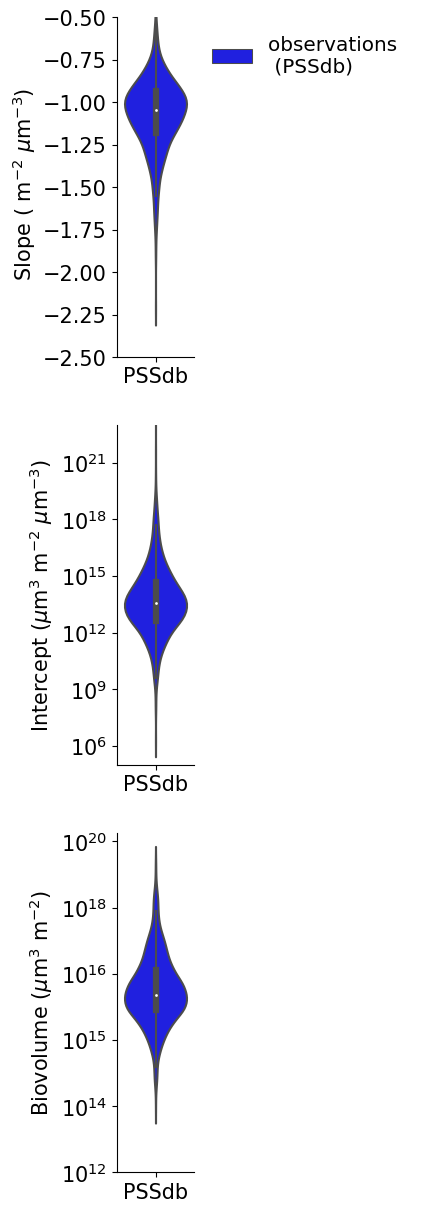

In [17]:
palette_experiments= dict(hist='rosybrown', ssp5='firebrick', obs='blue')
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(1,15))
letters = ['a.','b.','c.']
ind=0
variables = ['slope', 'intercept', 'total_biovolume']
for r, var in enumerate(variables):
    if var == 'slope':
        plot = sns.violinplot(ax = axs[r], x="source", y=var, hue="experiment",palette=palette_experiments, fill=False, showfliers = False, density_norm="count", data=df_pssdb) #, flierprops=dict(marker='o', markersize=0.5)
        plot.tick_params(axis='both', which='major', labelsize=15)
        sns.despine(top = True, right = True)
        axs[r].set_ylim([-2.5, -0.5])
        axs[r].set_ylabel(r' Slope ( m$^{-2}$ $\mu$m$^{-3}$)', fontsize = 15)
        L = axs[r].legend(title='', fontsize = 'x-large',  markerscale=10, frameon=False, bbox_to_anchor=(1, 1))
        #L.get_texts()[0].set_text('historical period \n (1985-2014)')
        #L.get_texts()[1].set_text('SSP5-8.5 \n (2070-2100)')
        L.get_texts()[0].set_text('observations \n (PSSdb)')

    elif var == 'intercept':
        plot = sns.violinplot(ax = axs[r], x="source", y=var, hue="experiment",palette=palette_experiments,  fill=False, showfliers = False,  density_norm="count",data=df_pssdb, log_scale=True) #, flierprops=dict(marker='o', markersize=0.5)
        plot.tick_params(axis='both', which='major', labelsize=15)
        sns.despine(top = True, right = True)
        axs[r].set_ylabel(r'Intercept ($\mu$m$^{3}$ m$^{-2}$ $\mu$m$^{-3}$)', fontsize = 15)
        axs[r].set_ylim([5, 23])
        axs[r].yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
        ymin, ymax = axs[r].get_ylim()
        tick_range = np.arange(np.floor(ymin), ymax)
        axs[r].yaxis.set_ticks(tick_range)
        axs[r].yaxis.set_major_locator(plt.MaxNLocator(6))
        #axs[r].yaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)
        axs[r].get_legend().remove()
        
    elif var == 'total_biovolume':
        plot = sns.violinplot(ax = axs[r], x="source", y=var, hue="experiment",palette=palette_experiments,  fill=False,showfliers = False,  density_norm="count",data=df_pssdb, log_scale=True) #, flierprops=dict(marker='o', markersize=0.5)
        plot.tick_params(axis='both', which='major', labelsize=15)
        sns.despine(top = True, right = True)
        axs[r].set_ylabel(r'Biovolume ($\mu$m$^{3}$ m$^{-2}$)', fontsize = 15)
        #axs[r].set_ylim([8, 16])
        #axs[r].set_yscale('log')
        axs[r].yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
        ymin, ymax = axs[r].get_ylim()
        tick_range = np.arange(np.floor(ymin), ymax)
        axs[r].yaxis.set_ticks(tick_range)
        axs[r].yaxis.set_major_locator(plt.MaxNLocator(6))
        #axs[r].yaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)
        axs[r].get_legend().remove()
    axs[r].set_xlabel('')
        
plt.tight_layout()
plt.savefig('/Users/mc4214/GIT/CMIP6_size_spectra/figures/fig_model_avg_biovolume_PSSdb.pdf', dpi=300, bbox_inches = 'tight')

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=8, figsize=(30,10))
variables = ['slope', 'intercept']
for c, m in enumerate(model_list):
    #print(r)
    for r, var in enumerate(variables):
        #print(c)
        ax_n = axs[r,c]
        if m == 'PSSdb':
            sns.boxplot(ax = ax_n, x="biome", y=var, color='g', order =['LC', 'HCSS', 'HCPS'],  showfliers = False, data=df_NBSS[df_NBSS['source']== m])#.set(title= (name + ' for model ' + m + ' by biome'))
        else:
            sns.boxplot(ax = ax_n, x="biome", y=var, hue="experiment",order =['LC', 'HCSS', 'HCPS'], showfliers = False, data=df_NBSS[df_NBSS['source']== m])#.set(title= (name + ' for model ' + m + ' by biome'))
            if r >0 or c >0:
                ax_n.get_legend().remove()
        ax_n.tick_params(axis='both', which='major', labelsize=15)
        if r == 0:
            ax_n.set_title(m, fontsize=20)
        else:
            ax_n.set_title('')
        if var == 'slope':
            ax_n.set_ylim([-1.9, -0.4])

            if m =='GISS':
                ax_n.set_ylim([-4, -0.5])

        elif var == 'intercept':  
            ax_n.set_ylim([7, 22])
            
            if m =='GISS':
                ax_n.set_ylim([13,40])


        if var == 'slope':
            ax_n.set_ylabel(r'Slope ( m$^{-2}$ $\mu$m$^{-3}$)', fontsize = 17)
        else:
            ax_n.set_ylabel(r'$log_{10}$(Intercept ($\mu$m$^{-3}$ m$^{-2}$ $\mu$m$^{-3}$))', fontsize = 17)
        
        ax_n.set_xlabel('')
        #ax_n.set_xticklabels('biomes', fontsize=15)
        #ax_n.set_yticklabels(var, fontsize=15)

        
            
plt.tight_layout()
plt.savefig('fig_biomes_biovol_avg.pdf', dpi=300)

In [ ]:
            if m =='UKESM':
                ax_n.set_ylim([-1.91, -1.5])
            if m =='CNRM':
                ax_n.set_ylim([-1.6, -1.4])
            if m =='IPSL':
                ax_n.set_ylim([-1.6, -1.4])
            if m =='CMCC':
                ax_n.set_ylim([-1.6, -1.4])  
            if m =='CESM':
                ax_n.set_ylim([-1.20, -0.9])
            if m =='GFDL':
                ax_n.set_ylim([-1.65, -1.5])
                
                if m =='CESM':
                ax_n.set_ylim([14.5,18])
            if m =='CMCC':
                ax_n.set_ylim([16.5,19])
            if m =='CNRM':
                ax_n.set_ylim([17.25,18.25]) 
            if m =='GFDL':
                ax_n.set_ylim([17,21.5])
                            if m =='IPSL':
                ax_n.set_ylim([16.5,18.5])
            if m =='UKESM':
                ax_n.set_ylim([18.5,21])